# <center style="color:red"> **Principal Components Analysis** </center>  

<h4 style="text-align:right">By Trần Minh Dương</h4>  

# Overview  

Principal component analysis (PCA) is a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends.

# Steps

1. Standardize the range of continuous initial variables

2. Compute the covariance matrix to identify correlations

3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

4. Create a feature vector to decide which principal components to keep

5. Recast the data along the principal components axes

Let's break down PCA step by step by dealing with an example

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load data: Wine Quality Dataset
pandas_data = pd.read_csv("WineQT.csv")
pandas_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [36]:
raw_data = pandas_data.to_numpy()
raw_data = raw_data[:,:-1] #Drop the ID column
print("Raw data: \n",np.array_str(raw_data,precision=2,suppress_small=True))

Raw data: 
 [[ 7.4   0.7   0.   ...  0.56  9.4   5.  ]
 [ 7.8   0.88  0.   ...  0.68  9.8   5.  ]
 [ 7.8   0.76  0.04 ...  0.65  9.8   5.  ]
 ...
 [ 6.2   0.6   0.08 ...  0.58 10.5   5.  ]
 [ 5.9   0.55  0.1  ...  0.76 11.2   6.  ]
 [ 5.9   0.65  0.12 ...  0.71 10.2   5.  ]]


## Step 1: Standardization

The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

In [37]:
mean = np.mean(raw_data,axis=0)
std = np.std(raw_data,axis=0)
#Standardized data
data = (raw_data - mean) / std
print("Standardized data: \n",np.array_str(data,precision=2,suppress_small=True))


Standardized data: 
 [[-0.52  0.94 -1.37 ... -0.57 -0.96 -0.82]
 [-0.29  1.94 -1.37 ...  0.13 -0.59 -0.82]
 [-0.29  1.27 -1.16 ... -0.05 -0.59 -0.82]
 ...
 [-1.21  0.38 -0.96 ... -0.46  0.05 -0.82]
 [-1.38  0.1  -0.86 ...  0.6   0.7   0.43]
 [-1.38  0.63 -0.75 ...  0.31 -0.22 -0.82]]


## Step 2: Covariance Matrix

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information.

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a 3-dimensional data set with 3 variables x, y, and z, the covariance matrix is a 3×3 data matrix of this form:

<center>
<img src="../images/covariance_matrix.png">
</center>

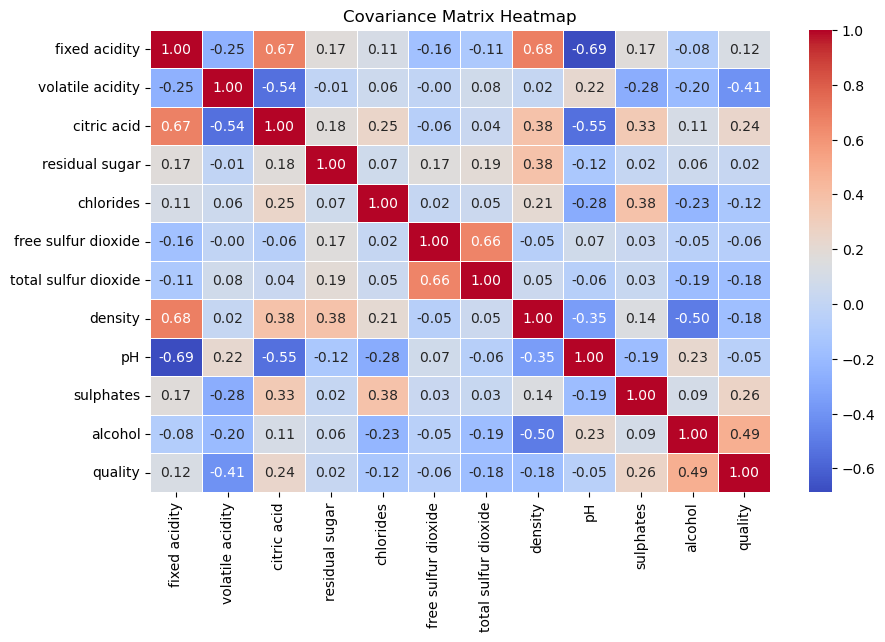

In [38]:
cov_matrix = np.cov(data, rowvar=False)

# Visualize covariance matrix
feature_names = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
    "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"
]
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,xticklabels=feature_names, yticklabels=feature_names)
plt.title("Covariance Matrix Heatmap")
plt.show()

**What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?**

It’s actually the sign of the covariance that matters:

+ If positive then: the two variables increase or decrease together (correlated)

+ If negative then: one increases when the other decreases (Inversely correlated)

## Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix

It is eigenvectors and eigenvalues who are behind all the magic of principal components:

- Eigenvectors are the directions of the axes that contains the most variance (most information) and that we call Principal Components.

- Eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

Eigenvalues:
 [3.18  2.237 1.688 1.217 0.968 0.058 0.176 0.667 0.587 0.333 0.492 0.408]
Eigenvectors:
 [[-0.484  0.006  0.159  0.237  0.099 -0.628 -0.294 -0.093 -0.286  0.163
   0.217  0.174]
 [ 0.253  0.36   0.203 -0.023 -0.322 -0.013  0.367 -0.381 -0.581 -0.131
   0.143  0.075]
 [-0.47  -0.144 -0.108  0.03   0.125  0.053  0.642 -0.114  0.251 -0.313
   0.304  0.222]
 [-0.169  0.143 -0.23   0.42  -0.682 -0.183  0.095 -0.044  0.292  0.05
  -0.196 -0.292]
 [-0.211  0.186 -0.014 -0.637 -0.294 -0.047 -0.241 -0.326  0.274 -0.01
  -0.186  0.391]
 [ 0.056  0.228 -0.631  0.04   0.149  0.038  0.199  0.018 -0.126  0.605
  -0.017  0.316]
 [ 0.002  0.333 -0.568  0.043  0.203 -0.048 -0.321 -0.087 -0.108 -0.611
   0.082 -0.133]
 [-0.377  0.323  0.16   0.2   -0.188  0.576 -0.203  0.415 -0.165 -0.041
   0.067  0.271]
 [ 0.427 -0.076 -0.059  0.008 -0.279 -0.343 -0.     0.493  0.137 -0.208
   0.291  0.473]
 [-0.25  -0.14  -0.208 -0.544 -0.242 -0.069  0.09   0.381 -0.315  0.086
   0.259 -0.434]
 [ 0.081 

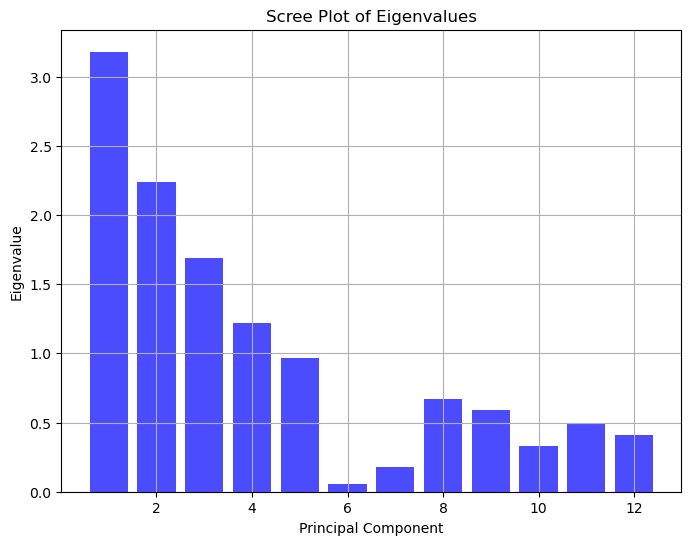

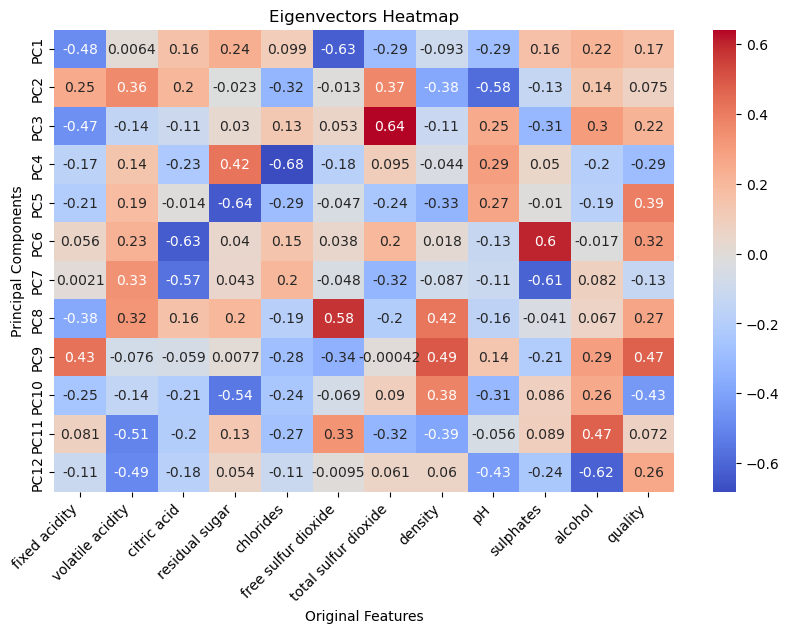

In [39]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", np.array_str(eigenvalues,precision=3,suppress_small=True))
print("Eigenvectors:\n", np.array_str(eigenvectors,precision=3,suppress_small=True))

# Visualize eigenvalues
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='blue', alpha=0.7)
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot of Eigenvalues")
plt.grid()
plt.show()

# Visualize eigenvectors as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(eigenvectors, annot=True, cmap='coolwarm', xticklabels=feature_names, yticklabels=[f'PC{i+1}' for i in range(len(feature_names))])
plt.title("Eigenvectors Heatmap")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.xticks(rotation=45, ha='right')
plt.show()

## Step 4: Select principal components
Ordering eigenvalues in descending order allows us to find the principal components in order of significance.

The feature vector is simply a matrix that has as columns the eigenvectors of the components that we decide to keep. This contributes to dimensionality reduction, because we choose to keep only p eigenvectors (components) out of n dimensions.

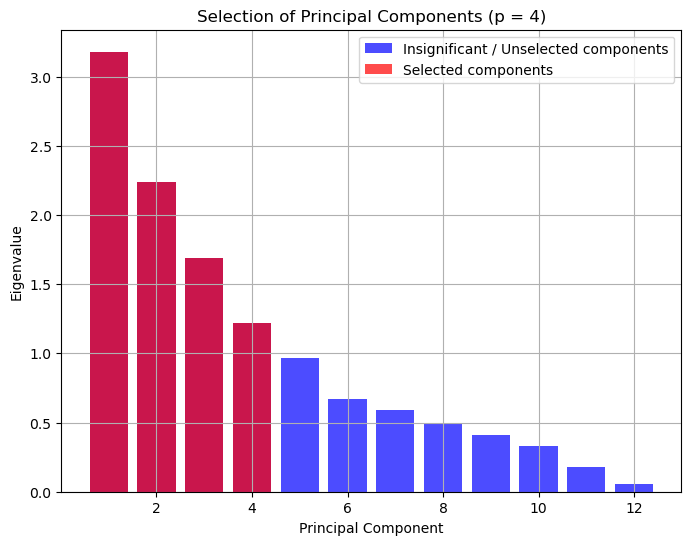

In [46]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

p = 4 # Number of principal components to retain
eigenvectors_reduced = eigenvectors[:,:p]

# Visualize eigenvalues
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='blue', alpha=0.7,label="Insignificant / Unselected components")
plt.bar(range(1, len(eigenvalues[:p]) + 1), eigenvalues[:p], color='red', alpha=0.7,label="Selected components")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.title(f"Selection of Principal Components (p = {p})")
plt.grid()
plt.legend()
plt.show()

## Step 5: Recast the Data along the Principal Components Axes

Finally, we project the data onto the new principal components. This can be done by computing the dot product of the standardized data set by the transpose of the feature vector.

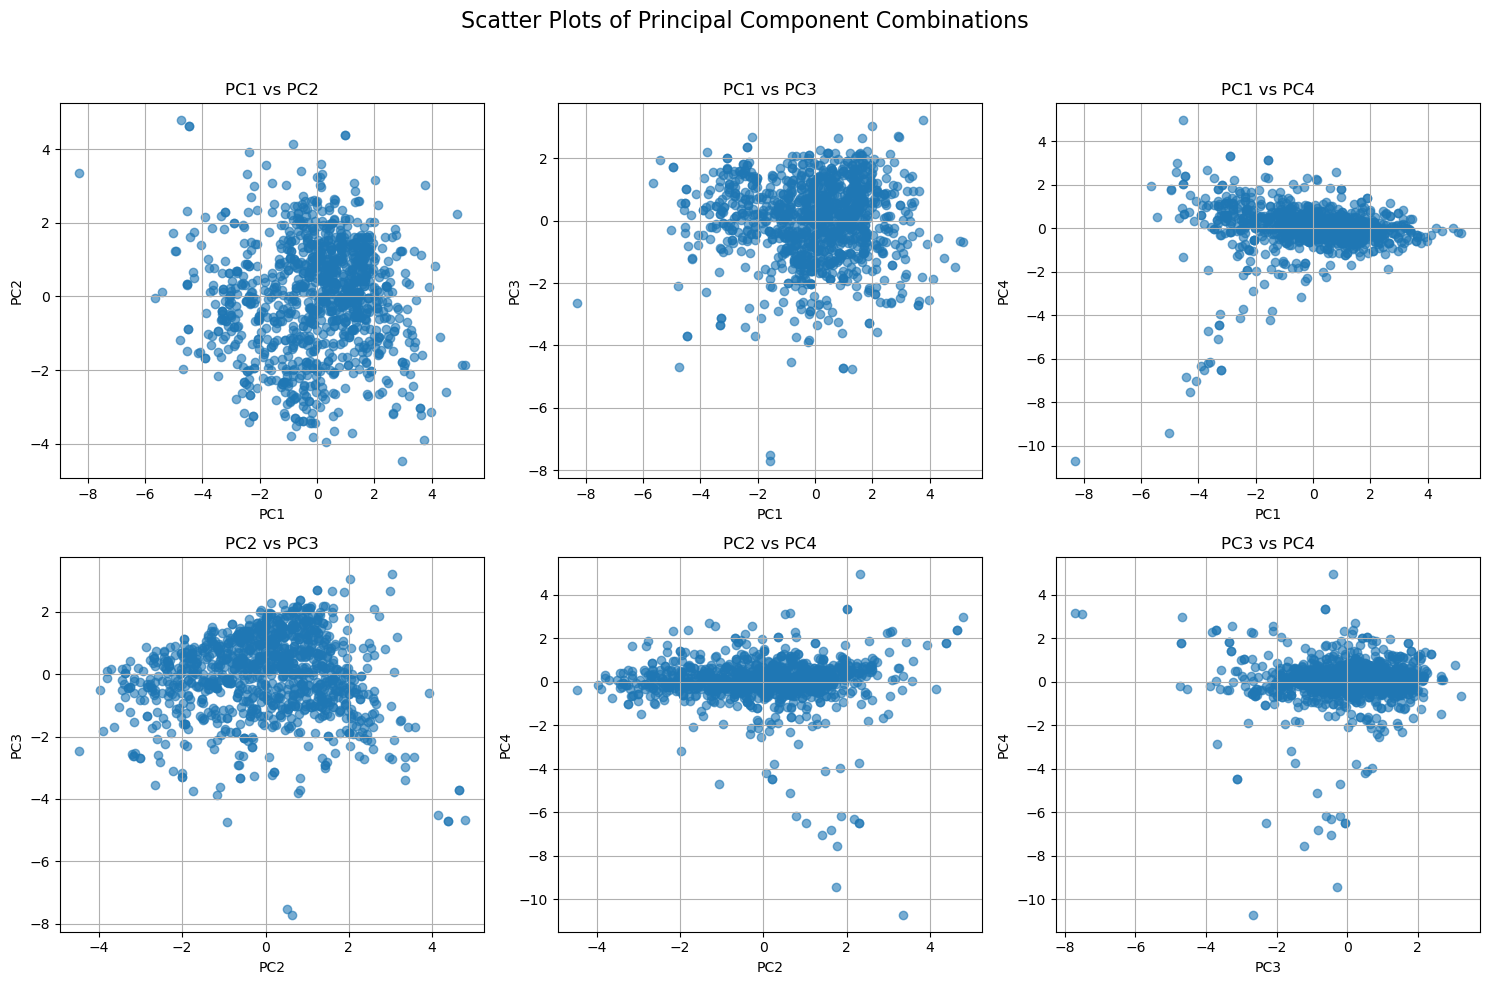

In [47]:
data_pca = data.dot(eigenvectors_reduced)
# No need for transpose of eigenvectors_reduced since it already consists of column vectors

import itertools
num_plots = p * (p - 1) // 2
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
fig.suptitle("Scatter Plots of Principal Component Combinations", fontsize=16)

combinations = list(itertools.combinations(range(p), 2))
for idx, (i, j) in enumerate(combinations):
    row, col = divmod(idx, cols)
    ax = axes[row, col] if rows > 1 else axes[col]
    ax.scatter(data_pca[:, i], data_pca[:, j], alpha=0.6)
    ax.set_xlabel(f'PC{i+1}')
    ax.set_ylabel(f'PC{j+1}')
    ax.set_title(f'PC{i+1} vs PC{j+1}')
    ax.grid()

# Remove empty subplots
for idx in range(num_plots, rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()